<a href="https://colab.research.google.com/github/Iroda732/fork1/blob/main/Avia_ticket_price_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [6]:
!pip install kaggle

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [9]:
! kaggle competitions download -c aviachipta-narxini-bashorat-qilish

  0% 0.00/382k [00:00<?, ?B/s]
100% 382k/382k [00:00<00:00, 77.5MB/s]


In [10]:
! unzip aviachipta-narxini-bashorat-qilish.zip

Archive:  aviachipta-narxini-bashorat-qilish.zip
  inflating: sample_solution.csv     
  inflating: test_data.csv           
  inflating: train_data.csv          


In [56]:
from zipfile import ZipFile

with ZipFile('/content/aviachipta-narxini-bashorat-qilish.zip') as myzip:
    with myzip.open('train_data.csv') as myfile:
     train_df = pd.read_csv(myfile)

    with myzip.open('test_data.csv') as myfile:
     test_df = pd.read_csv(myfile)
train_df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [57]:
train_df = train_df.drop(['id'], axis=1)


In [58]:
train_df.shape

(20000, 11)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.7+ MB


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           5000 non-null   object 
 1   flight            5000 non-null   object 
 2   source_city       5000 non-null   object 
 3   departure_time    5000 non-null   object 
 4   stops             5000 non-null   object 
 5   arrival_time      5000 non-null   object 
 6   destination_city  5000 non-null   object 
 7   class             5000 non-null   object 
 8   duration          5000 non-null   float64
 9   days_left         5000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 390.8+ KB


In [17]:
train_df.describe()

,duration,days_left,price
count,20000.000000,20000.000000,20000.000000
mean,12.177627,25.924150,20960.281700
std,7.157944,13.624874,22775.459535
min,0.830000,1.000000,1105.000000
25%,6.830000,14.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.080000,38.000000,42521.000000
max,38.580000,49.000000,114523.000000


In [18]:
train_df['airline'].value_counts()

,count
airline,
Vistara,8535
Air_India,5371
Indigo,2924
GO_FIRST,1508
AirAsia,1056
SpiceJet,606


In [69]:
train_df['flight'].value_counts()

,count
flight,
UK-706,208
UK-720,190
UK-822,178
UK-772,169
UK-836,169
...,...
6E-2033,1
6E-869,1
6E-2841,1


In [70]:
train_df['source_city'].value_counts()

,count
source_city,
Mumbai,4068
Delhi,4022
Bangalore,3486
Kolkata,3092
Hyderabad,2748
Chennai,2584


In [71]:
train_df['departure_time'].value_counts()

,count
departure_time,
Morning,4738
Early_Morning,4432
Evening,4341
Night,3231
Afternoon,3166
Late_Night,92


In [72]:
train_df['stops'].value_counts()

,count
stops,
one,16666
zero,2440
two_or_more,894


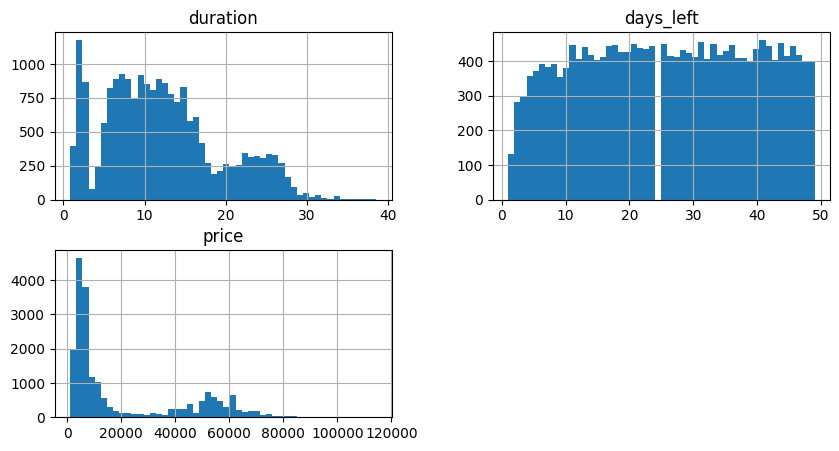

In [19]:
%matplotlib inline
train_df.hist(bins=50, figsize=(10, 5))
plt.show()

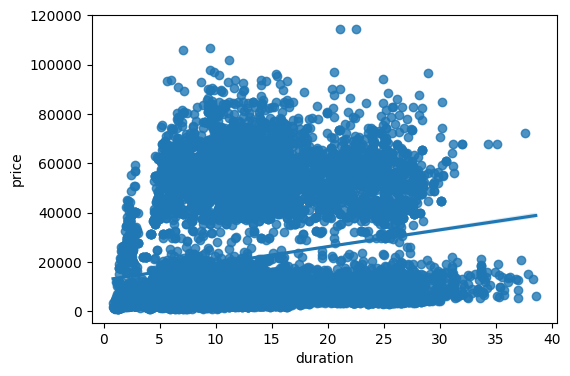

In [20]:
plt.figure(figsize=(6,4))
sns.regplot(y=train_df['price'], x=train_df['duration'])
plt.show()

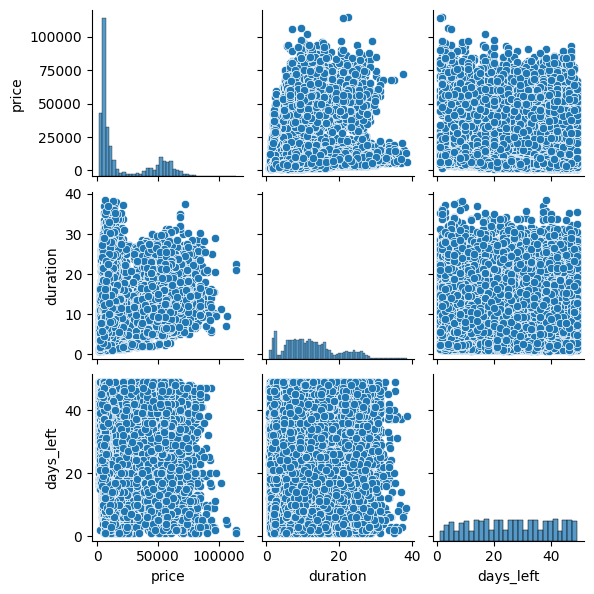

In [91]:
cols = ['price' , 'duration' , 'days_left']
sns.pairplot(train_df[cols], height=2)
plt.show()

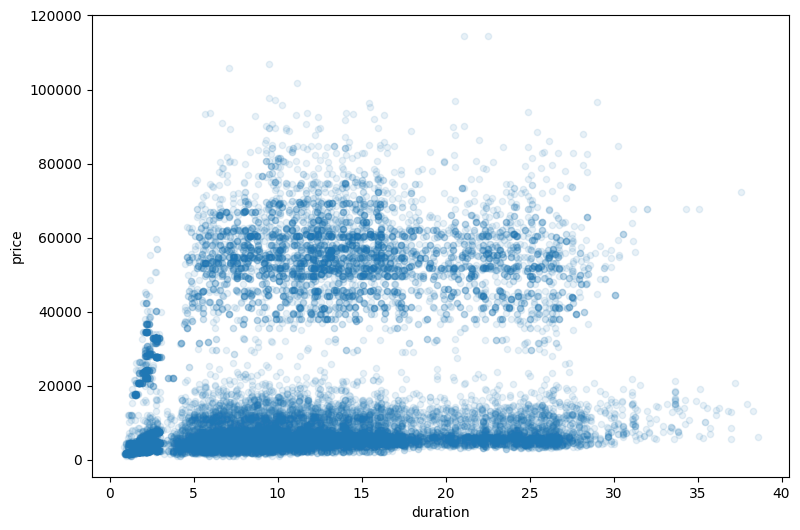

In [76]:
train_df.plot(kind='scatter', x='duration', y='price', alpha=0.1, figsize=(9,6))
plt.show()

In [21]:
train_df['duration_cat'] = pd.cut(train_df['duration'], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])

from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in stratified_split.split(train_df,train_df['duration_cat']):
    strat_train_set = train_df.loc[train_index]
    strat_test_set = train_df.loc[test_index]

strat_train_set.drop('duration_cat', axis=1, inplace=True)
strat_test_set.drop('duration_cat', axis=1, inplace=True)

In [22]:
X_train = strat_train_set.drop("price", axis=1)
y = strat_train_set["price"].copy()

In [23]:
X_num = X_train.drop("flight", axis=1)

In [24]:
X_num = X_train[['duration', 'days_left']]
X_cat = X_train[['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'class', 'stops']]
X_cat

,airline,source_city,destination_city,departure_time,arrival_time,class,stops
4413,Indigo,Hyderabad,Delhi,Morning,Evening,Economy,one
3464,Air_India,Bangalore,Chennai,Evening,Morning,Economy,one
6755,Indigo,Mumbai,Chennai,Afternoon,Evening,Economy,zero
7804,GO_FIRST,Mumbai,Hyderabad,Afternoon,Late_Night,Economy,one
13986,AirAsia,Delhi,Bangalore,Early_Morning,Afternoon,Economy,one
...,...,...,...,...,...,...,...
287,Indigo,Hyderabad,Delhi,Morning,Night,Economy,one
14349,Air_India,Mumbai,Delhi,Night,Morning,Economy,one
3622,Vistara,Delhi,Bangalore,Evening,Evening,Business,zero
16090,GO_FIRST,Bangalore,Delhi,Morning,Afternoon,Economy,one


In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
duration_ix, days_left_ix = 9, 10

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        columns=['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'class', 'stops']
        X = pd.get_dummies(X, columns=columns)

        return X

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='median')),
          ('std_scaler', StandardScaler())
])

In [27]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
cat_attribs = list(X_cat) #['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'class', 'stops']

full_pipeline = ColumnTransformer([
     ('num', num_pipeline, num_attribs),
     ('cat', OneHotEncoder(), cat_attribs)
])

In [28]:
X_prepared = full_pipeline.fit_transform(X_train)
X_prepared_dense = X_prepared.toarray()
X_prepared_dense

array([[-0.96057526, -0.35890583,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.53945747, -0.21242113,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-1.41407352,  1.69188002,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.32058311, -0.35890583,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.64661492,  1.39891061,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-1.03034422,  1.17918355,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [29]:
LR_model = LinearRegression()
LR_model.fit(X_prepared_dense, y)

LinearRegression()

In [30]:
test_data = X_train.sample(5)
test_data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
12342,Air_India,AI-808,Bangalore,Night,one,Morning,Mumbai,Economy,14.25,25
11977,Vistara,UK-826,Chennai,Afternoon,one,Night,Bangalore,Economy,8.42,39
17736,AirAsia,I5-1569,Mumbai,Night,zero,Night,Bangalore,Economy,1.92,11
16434,Indigo,6E-591,Chennai,Morning,one,Night,Mumbai,Economy,8.83,46
834,Air_India,AI-770,Kolkata,Night,one,Evening,Hyderabad,Economy,21.08,11


In [31]:
test_label = y.loc[test_data.index]
test_label

,price
12342,6578
11977,4755
17736,5104
16434,1830
834,12185


In [32]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prep =  test_data_prepared.toarray()
test_data_prep

array([[ 0.28410306, -0.06593643,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ],
       [-0.52940306,  0.9594565 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.     

In [33]:
predicted_data = LR_model.predict(test_data_prep)
predicted_data

array([5857.  , 7902.  ,  557.25, 5526.5 , 8885.25])

In [34]:
pd.DataFrame({'Real baxosi': test_label, 'Prognoz':predicted_data})

,Real baxosi,Prognoz
12342,6578,5857.00
11977,4755,7902.00
17736,5104,557.25
16434,1830,5526.50
834,12185,8885.25


In [35]:
strat_test_set

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
2521,AirAsia,I5-1229,Chennai,Evening,one,Late_Night,Kolkata,Economy,9.50,39,2361
5715,Air_India,AI-440,Chennai,Early_Morning,one,Night,Mumbai,Economy,15.08,45,4357
6556,Vistara,UK-830,Hyderabad,Morning,one,Night,Kolkata,Business,12.42,8,51819
10978,Vistara,UK-875,Mumbai,Evening,zero,Night,Hyderabad,Business,1.58,42,17604
1626,Vistara,UK-778,Kolkata,Afternoon,one,Night,Mumbai,Business,30.25,42,74273
...,...,...,...,...,...,...,...,...,...,...,...
6162,AirAsia,I5-1569,Mumbai,Night,one,Morning,Hyderabad,Economy,11.42,22,2105
14295,Indigo,6E-5207,Hyderabad,Morning,zero,Morning,Mumbai,Economy,1.58,28,3096
7737,Vistara,UK-981,Delhi,Night,one,Morning,Bangalore,Business,13.08,24,54777
12339,Vistara,UK-706,Kolkata,Morning,two_or_more,Evening,Chennai,Economy,33.67,42,15082


In [36]:
X_test = strat_test_set.drop('price', axis=1)
X_test

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
2521,AirAsia,I5-1229,Chennai,Evening,one,Late_Night,Kolkata,Economy,9.50,39
5715,Air_India,AI-440,Chennai,Early_Morning,one,Night,Mumbai,Economy,15.08,45
6556,Vistara,UK-830,Hyderabad,Morning,one,Night,Kolkata,Business,12.42,8
10978,Vistara,UK-875,Mumbai,Evening,zero,Night,Hyderabad,Business,1.58,42
1626,Vistara,UK-778,Kolkata,Afternoon,one,Night,Mumbai,Business,30.25,42
...,...,...,...,...,...,...,...,...,...,...
6162,AirAsia,I5-1569,Mumbai,Night,one,Morning,Hyderabad,Economy,11.42,22
14295,Indigo,6E-5207,Hyderabad,Morning,zero,Morning,Mumbai,Economy,1.58,28
7737,Vistara,UK-981,Delhi,Night,one,Morning,Bangalore,Business,13.08,24
12339,Vistara,UK-706,Kolkata,Morning,two_or_more,Evening,Chennai,Economy,33.67,42


In [37]:
y_test = strat_test_set['price'].copy()
y_test

,price
2521,2361
5715,4357
6556,51819
10978,17604
1626,74273
...,...
6162,2105
14295,3096
7737,54777
12339,15082


In [38]:
X_test_prepared = full_pipeline.transform(X_test)

In [39]:
y_predicted = LR_model.predict(X_test_prepared)

In [40]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

6957.597010105662


In [41]:
X = train_df.drop("price", axis=1)
y = train_df["price"].copy()

X_prepared = full_pipeline.transform(X)
X_prepared_den = X_prepared.toarray()


In [42]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
scores = cross_val_score(LR_model, X_prepared_den, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [49]:
display_scores(LR_rmse_scores)

Scores: [6753.83811261 6729.40098885 6676.00665564 6361.73487908 6727.38427823
 6736.09087084 6923.49627497 6539.5405368  6716.53350295 6994.15120701]
Mean: 6715.81773069824
Std.dev: 167.5734138472075
